
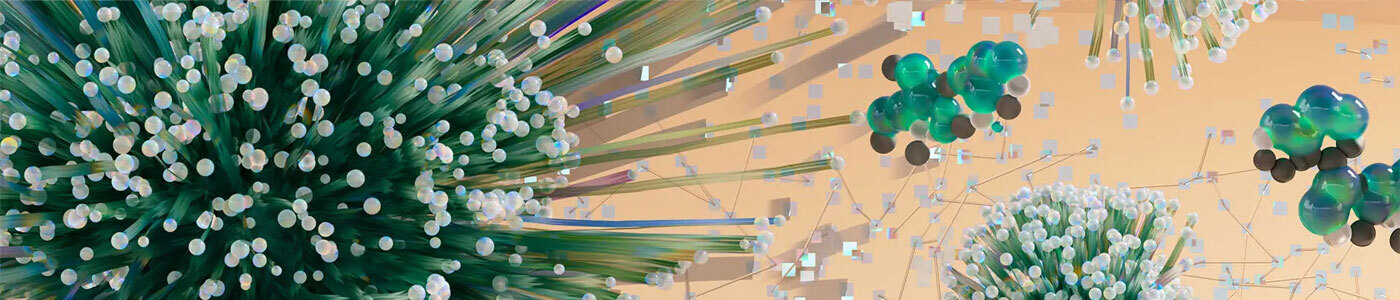
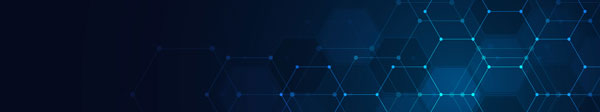

In [1]:
%reload_ext openad.notebooks.styles

<div class="banner"><div>Introduction</div><b>OpenAD Deep Search Commands</b></div>

# Deep Search Command Introduction
_The Deep Search toolkit is called **DS4SD** which stands for Deep Search for Scientific Discovery._

<br><br>

## 1. Getting Started
<hr>

<br>

### Setting up Magic Commands
The Magic command `%run` is only required if you did not execute `init_magic` from the command line.

In [ ]:
# %run openad_magic.ipynb # Not required if you have run init_magic

<br>

### Setting up the AI assistant 
If you'd like to be assisted by the AI assistent, you'll need to create your own account with BAM or LLM Server with OLLAMA for the `tell me` command to work. Please refer to the [documentation](https://acceleratedscience.github.io/openad-docs/installation.html#ai-assistant) for instructions. Support for watsonx is coming soon.

In [ ]:
%openad tell me how would I create a workspace then search for ibuprofen using deepsearch then display them with a viewer

<br>

### Installing the toolkit
If this is your first time using the DS4SD toolkit, you will first have to install it. By installing, the context will be set automatically.

In [ ]:
# %openad clear sessions
%openad add toolkit DS4SD

<br>

### Updating the toolkit
If you've installed the Deep Search toolkit before, let's update it to ensure you're running the latest version.

In [ ]:
# %openad clear sessions
%openad update toolkit DS4SD

Now let's set the context to DS4SD.

In [ ]:
%openad set context DS4SD

If you ever want to check what context or workspace you are in, you can run the command below.

In [ ]:
%openad get status

<br>

### Available DS4SD commands
Let's list all available commands for this toolkit.

In [ ]:
%openad ? DS4SD

<br><br>

## 2. Displaying Domains
<hr>

<br>

### Displaying all collections and domains
<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">display all collections</pre>

This command will list all available collections in Deep Search.

In [ ]:
%openad display all collections

Any result tables can displayed and edited using the result commands.

<br>

### Search for relevant collections
<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">display collection matches for '&lt;search_string&gt;' [ save as '&lt;filename.csv&gt;' ]</pre>

This command lets you find out which collections hold documents that contain a given Deep Search search string.

In [ ]:
%openad display collection matches ?

In [ ]:
%openad display collection matches for '"carbon capture"'

<br>

### Display collections for a specific domain
To see what domains are available, you can run `display all collections`

In [ ]:
%openad display collections for domain 'Business Insights'

<br>

### Subset collections by a set of domains
Let's list all collection within a set list of domains.

In [ ]:
%openad display collections in domains from list [ 'Business Insights','Climate & Sustainability']

<br>

### Get collection details
You can drill into the details behind a collection to see its source, date and more.

In [ ]:
%openad display collection details 'ESG Reports'

<br><br>

## 3. Searching a Collection
<hr>

<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">search collection '&lt;collection_name_or_key&gt;' for '&lt;search_string&gt;' [ using (page_size=&lt;int&gt; system_id=&lt;system_id&gt; edit_distance=&lt;integer&gt; display_first=&lt;integer&gt;) ] show (data | docs) [ estimate only | return as data | save as '&lt;filename.csv&gt;' ]</pre>

This command allows you to execute a search against a variety of collections letting you to pull back documents with snippets highlighting the data mathcing the search criteria.

Our examples will cover its simplest form plus a variety of options.

In [ ]:
%openad search collection ?

<br><br>

### <span style="color: green">Example A:</span> Query arXiv for "*power conversion efficiency*"

In this example we'll search for the input query in documents from the arXiv.org data collection. For each matched document we'll return the title, authors as well as the link to the original document on arXix.org

#### What we'll cover:
1. How to address a specific data collection
2. How to choose which component of the documents should be returned
3. How to iterate through the complete data collection by fetching page_size=50 results at the time

<br>

### Getting the result estimate

First we will run and get an estimate of how many documents may appear in the search so we know we are pulling back a manageable amount.

In [ ]:
%openad search collection 'arXiv abstracts' for 'ide("power conversion efficiency" OR PCE) AND organ* ' show (docs) estimate only

<br>

### Retrieving results
Unless the `return as data` clause is set, results be returned as a ***pandas styler object*** which provides an enhanced snippet display of the data.

The styler object can be displayed straightaway, or assigned to a variable. To extract the raw data from the dataframe, you can reference `df_styler.data`.

In [ ]:
df_styler = %openad search collection 'arXiv abstracts' for 'ide("power conversion efficiency" OR PCE) AND organ* ' using \
(system_id=default edit_distance=20) show (data docs)

Now the data is store in our variable, we can display it in a next step. By right-clicking the cell's output, you can enable cell scrolling, which may be easier to review the output rather than it taking up the entire notebook.

In [ ]:
df_styler

<br>

### Simply viewing the Results
If the results are not stored in a variable, they will be displayed straightaway. Notice we are using the `page_size` and `edit_distance` options to finetune our results. You can try experiment with  different values for these options.

In [ ]:
%openad search collection 'arXiv abstracts' for ' " carbon capture" AND "membrane" ' using (page_size=10 edit_distance=5) show (data docs)

<br><br>

### <span style="color: green">Example B:</span> Search for "_Ibuprofen_" on PubChem

In this example we'll search for all PubChem entries which contain the string _Ibuprofen_. In the results table we see the name of the chemical, its molecule SMILES and some properties such as the molecular weight and the solubility.


In [ ]:
ibuprofen_df = %openad search collection 'pubchem' for 'Ibuprofen' SHOW (data)
display(ibuprofen_df)

<br>

### Working with the results as data
By using the `return as data` clause, results will be returned as a raw dataframe, which allows us to pass them to other utilities.

In [ ]:
my_mols = %openadd search collection 'pubchem' for 'Ibuprofen' show (data) return as data

In [ ]:
%openad load molecules using dataframe my_mols

In [ ]:
%openad list molecules

In [ ]:
%openad display molecule Mabuprofen

<br>

### Larger sets of data

In [ ]:
%openad search collection 'pubchem' for 'pain' show (data)

Now let's edit the result set and rename the molecule Lorazepam

Next we'll take the edited results and load them into our molecule working set

In [ ]:
my_mols = %openadd result as dataframe
%openad load molecules using dataframe my_mols

Next we'll use the `show molecules` command to visualize and subset the results.

In [ ]:
%openad show molecules

Next up, you could load this selection back into your molecule working set if you wish.

For this demo, we'll continue instead by displaying one of the molecules from our list.

In [ ]:
%openad display mol Noscapine

<br>

### Visualizing the molecules
<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">show molecules </pre>

In this example, we'll first search for molecular data records related to 'Ibuprofen', store the results as a dataframe in a variable, then pass it to `show molecules` to visualize the results.

In [ ]:
my_df = %openadd search collection 'pubchem' for 'Ibuprofen' show (data) return as data
%openad load molecules using dataframe my_df

By using the `as molsobject` clause, we can access the selected molecules of the molecule grid for further processing.

In [ ]:
%openad show molecules

<br><br>

## 4. Searching Molecules
<hr>

<br>

### Search for similar molecules
<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">search for similar molecules to '&lt;smiles&gt;' [ save as '&lt;filename.csv&gt;' ]</pre>

This command lets you search documents for any molecule that's similar to a given molecule.

In [ ]:
%openad search for similar ?

In [ ]:
smiles_molecule = "CC(C)(c1ccccn1)C(CC(=O)O)Nc1nc(-c2c[nH]c3ncc(Cl)cc23)c(C#N)cc1F"
mols = %openad search for similar molecules to '{smiles_molecule}'
display(mols)

<br>

### Search for patents containing a certain molecule

<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">search for patents containing molecule '&lt;smiles&gt;' | '&lt;inchi&gt;' | '&lt;inchikey&gt;' [ save as '&lt;filename.csv&gt;' ]</pre>

This command allows you to find patents that mention a specific molecule.

In [ ]:
%openad search for patents ?

In [ ]:
patents = %openadd search for patents containing molecule '{smiles_molecule}'
display(patents)

<br>

### Search for molecules in a list of patents
<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">search for molecules in patents from list ['&lt;patent1&gt;', '&lt;patent2&gt;', ...] | dataframe &lt;dataframe_name&gt; | file '&lt;filename.csv&gt;' [ save as '&lt;filename.csv&gt;' ]</pre>

Continuing with our list of patents of interest, this command allows you to find out what other molecules are mentioned in them.

In [ ]:
%openad search for molecules in patents ?

In [ ]:
my_list = list(patents["PATENT ID"])
my_frame = %openadd search for molecules in patents from list {my_list}
display(my_frame)

Next, we can take the results and visualize them the same way we did before, using the `show molecules` command.

In [ ]:
%openad load molecules using dataframe my_frame
%openad show molecules

<br>

### Search for molecule substructures
<pre style="color:#eec;background:#2f2d3a;padding:20px;margin:0;border-radius:5px">search for substructure instances of '&lt;smiles&gt;' [ save as '&lt;filename.csv&gt;' ]</pre>

This command lets you find molecules containing certain substructures as defined by a SMILES string.

In [ ]:
%openad search for substructure instances ?

The example below will write the results to a file called 'my_mol.csv' in your current workspace.

In [ ]:
%openad search for substructure instances of 'C1(C(=C)C([O-])C1C)=O' save as 'my_mol'